# Análisis de Egresos Hospitalarios

En este análisis se quiere ver la cantidad de egresos hospitalarios para diversos problemas
médicos, tanto cubiertos por GES y los no GES.

En primer lugar, se quiere ver qué diagnósticos son más importantes para el Hospital del Tórax
con respecto a la cantidad de Egresos. Esto significa que una mayor cantidad de Egresos
Hospitalarios significa una mayor importancia del Hospital. Este análisis se quiere observar
acumuladamente entre 2013 y 2019, cómo también la distribución de por años.


In [1]:
import importlib

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import funciones_auxiliares as aux
import funciones_auxiliares_hito_2 as aux2

sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 6)

importlib.reload(aux2)
importlib.reload(aux)

<module 'funciones_auxiliares' from 'c:\\Users\\finanzas\\Desktop\\Javier Rojas\\Javier\\trabajo\\SSMO\\EPH\\modulo_gestion\\1.analisis_problemas_de_salud\\egresos-hospitalarios\\funciones_auxiliares.py'>

# Carga de Archivos Nacionales

In [9]:
AGRUPACION_DIAGNOSTICOS = ['Capítulo', 'Sección', 'Categoría', 'Descripción', 'DIAG1']
GLOSA_TORAX = 'Instituto Nacional de Enfermedades Respiratorias y Cirugía Torácica'
PERTENECE_SNSS = 'Pertenecientes al Sistema Nacional de Servicios de Salud, SNSS'
NO_PERTENECE_SNSS = 'No Pertenecientes al Sistema Nacional de Servicios de Salud, SNSS'

In [3]:
dfs = aux.leer_anios_egresos()
df_completa = pd.concat(dfs.values())

cie = aux.obtener_diccionario_cie()
completa_con_cie = pd.merge(df_completa, cie, how='left', left_on='DIAG1', right_on='CodigoSinPunto')

c:\Users\finanzas\Desktop\Javier Rojas\Javier\trabajo\SSMO\EPH\modulo_gestion\1.analisis_problemas_de_salud\egresos-hospitalarios\funciones_auxiliares.py:55: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[anio] = pd.read_csv(ruta, delimiter=';', encoding='latin-1', on_bad_lines='skip')
c:\Users\finanzas\Desktop\Javier Rojas\Javier\trabajo\SSMO\EPH\modulo_gestion\1.analisis_problemas_de_salud\egresos-hospitalarios\funciones_auxiliares.py:55: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[anio] = pd.read_csv(ruta, delimiter=';', encoding='latin-1', on_bad_lines='skip')
c:\Users\finanzas\Desktop\Javier Rojas\Javier\trabajo\SSMO\EPH\modulo_gestion\1.analisis_problemas_de_salud\egresos-hospitalarios\funciones_auxiliares.py:55: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[anio] = pd.read_csv(ruta, delimiter=';', 

## Obtener solo diagnosticos del Torax

Esto se hace, para filtrar la base de datos Nacional y solo dejar los diagnosticos que aparecen
en el Torax. Permite reducir tiempo computacional.

In [8]:
diagnosticos_torax = aux.obtener_diagnosticos_hospital(completa_con_cie, GLOSA_TORAX)
completa_diags_torax = completa_con_cie[completa_con_cie['DIAG1'].isin(diagnosticos_torax)]

## Obtener estratos a analizar

En este caso, es el Interno, Publico y Privado.

In [10]:
torax_con_cie = completa_diags_torax.query('GLOSA_ESTABLECIMIENTO_SALUD == @GLOSA_TORAX')
df_publicos = completa_diags_torax.query('PERTENENCIA_ESTABLECIMIENTO_SALUD == @PERTENECE_SNSS')
df_privados = completa_diags_torax.query('PERTENENCIA_ESTABLECIMIENTO_SALUD == @NO_PERTENECE_SNSS '
                                        'or GLOSA_ESTABLECIMIENTO_SALUD == @GLOSA_TORAX')

# Ranking Tórax - Comparación Nacional

En este apartado se quiere responder a las preguntas:

- En que posición se encuentran los diagnósticos presentes en el Hospital del Tórax tanto a nivel
Nacional, como en nivel Público y Privado?

# Analisis por Año (2013 - 2019 separados)

In [12]:
agrupacion_anio = ['ANO_EGRESO', 'GLOSA_ESTABLECIMIENTO_SALUD'] + AGRUPACION_DIAGNOSTICOS
subgrupos_anio = ['ANO_EGRESO', 'DIAG1']

## Analisis por Numero de Egresos

In [13]:
variables_anio = ['N_Egresos']

In [14]:
ranking_por_anio_nacional, tabla_posicion_por_anio_nacional = aux.analizar_ranking_hospital(completa_con_cie, GLOSA_TORAX, 
                                                                      agrupacion_anio, 
                                                                      subgrupos_anio, 
                                                                      variables_anio)

ranking_por_anio_publico, tabla_posicion_por_anio_publico = aux.analizar_ranking_hospital(df_publicos, 
                                                                                      GLOSA_TORAX,
                                                                                      agrupacion_anio,
                                                                                      subgrupos_anio,
                                                                                      variables_anio)

ranking_por_anio_privado, tabla_posicion_por_anio_privado = aux.analizar_ranking_hospital(df_privados, GLOSA_TORAX,
                                                                                      agrupacion_anio,
                                                                                      subgrupos_anio, variables_anio)




In [46]:
diccionario_por_anio_posiciones = {'_Nacional': tabla_posicion_por_anio_nacional,
                                   '_Publico': tabla_posicion_por_anio_publico,
                                   '_Privado': tabla_posicion_por_anio_privado}

ESTRATOS_RANKINGS = ['Ranking_Interno', 'Ranking_Nacional', 'Ranking_Publico', 'Ranking_Privado']
ESTRATOS_PORCENTAJES = ['%_Egresos_Interno','%_Egresos_Nacional', '%_Egresos_Publico',
                        '%_Egresos_Privado']

METRICAS = ['N_Egresos'] + ESTRATOS_RANKINGS + ESTRATOS_PORCENTAJES

FILTRO_COLUMNAS_RANKING = (AGRUPACION_DIAGNOSTICOS + METRICAS)

FILTRO_COLUMNAS_POR_ANIO_RANKING = ['ANO_EGRESO', 'GLOSA_ESTABLECIMIENTO_SALUD'] + FILTRO_COLUMNAS_RANKING

In [96]:
union_por_anio = aux.unir_tablas_de_posicion_por_diagnostico(diccionario_por_anio_posiciones, 
                                                             agrupacion_anio + variables_anio)
union_por_anio = union_por_anio.sort_values(['ANO_EGRESO', 'N_Egresos'], ascending=False)
union_por_anio['Ranking_Interno'] = (union_por_anio.groupby(['ANO_EGRESO']).cumcount()) + 1
union_por_anio['%_Egresos_Interno'] = ((union_por_anio['N_Egresos']) / 
                                            (union_por_anio.groupby('ANO_EGRESO')['N_Egresos'].transform('sum')))

resumen_por_anio = union_por_anio[FILTRO_COLUMNAS_POR_ANIO_RANKING]

resumen_por_anio['Totales_Interno'] = resumen_por_anio['N_Egresos'] / resumen_por_anio['%_Egresos_Interno']
resumen_por_anio['Totales_Nacional'] = resumen_por_anio['N_Egresos'] / resumen_por_anio['%_Egresos_Nacional']
resumen_por_anio['Totales_Publico'] = resumen_por_anio['N_Egresos'] / resumen_por_anio['%_Egresos_Publico']
resumen_por_anio['Totales_Privado'] = resumen_por_anio['N_Egresos'] / resumen_por_anio['%_Egresos_Privado']

resumen_por_anio.to_excel('output/ranking_torax_pais/resumen_posiciones_torax_por_anio.xlsx', 
                          index=False)

C:\Users\finanzas\AppData\Local\Temp\ipykernel_16548\741761154.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resumen_por_anio['Totales_Interno'] = resumen_por_anio['N_Egresos'] / resumen_por_anio['%_Egresos_Interno']
C:\Users\finanzas\AppData\Local\Temp\ipykernel_16548\741761154.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resumen_por_anio['Totales_Nacional'] = resumen_por_anio['N_Egresos'] / resumen_por_anio['%_Egresos_Nacional']
C:\Users\finanzas\AppData\Local\Temp\ipykernel_16548\741761154

## Obtener DIAS ESTADA, % QUIRURGICO y % MORTALIDAD

In [104]:
dias_estada_torax = torax_con_cie.groupby(agrupacion_anio)['DIAS_ESTADA'].mean().reset_index()

In [136]:
desglose_int_q_torax = torax_con_cie.groupby(agrupacion_anio)['INTERV_Q'].value_counts('%').unstack().reset_index()
desglose_int_q_torax = desglose_int_q_torax.rename(columns={1: '%_Con', 2: '%_Sin'})
desglose_mortalidad_torax = torax_con_cie.groupby(agrupacion_anio)['CONDICION_EGRESO'].value_counts('%').unstack().reset_index()
desglose_mortalidad_torax = desglose_mortalidad_torax.rename(columns={1: '%_Vivos', 2: '%_Muertos'})

In [137]:
metricas = {'': resumen_por_anio,
            '_ESTADA': dias_estada_torax,
            '_Intervencion_Quirurgica': desglose_int_q_torax,
            '_Mortalidad': desglose_mortalidad_torax}

union_metricas = aux.unir_tablas_de_posicion_por_diagnostico(metricas, agrupacion_anio)

## Ranking de Problemas GES y no GES

Además del análisis exploratorio, existen problemas GES y no GES que actualmente tienen una
relevancia para el hospital. Por lo tanto, es necesario observar en qué posición se encuentran. Los
problemas son:

**Problemas GES:**

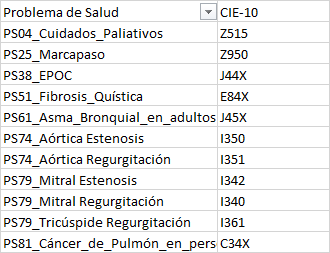

**Problemas no-GES:**

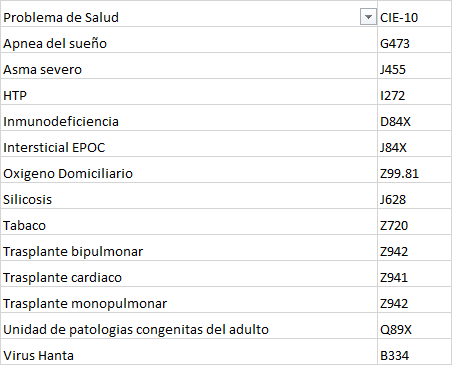

In [ ]:
codigos_ges = ['Z515', 'Z950', 'J440', 'J441', 'J448', 'J449', 'E840', 'E848', 'E849', 'J450', 
               'J459', 'I350', 'I060', 'I351', 'I061', 'I342', 'I050', 'I340', 'I051', 'I361', 
               'I071', 'C340', 'C341', 'C342', 'C343', 'C348', 'C349']

In [ ]:
resumen_por_anio

,ANO_EGRESO,Capítulo,Sección,Categoría,Descripción,DIAG1,N_Egresos,Ranking_Interno,Ranking_Nacional,Ranking_Publico,Ranking_Privado,%_Egresos_Interno,%_Egresos_Nacional,%_Egresos_Publico,%_Egresos_Privado,Totales_Interno,Totales_Nacional,Totales_Publico,Totales_Privado
2766,2019,Cap.21 FACTORES QUE INFLUYEN EN EL ESTADO DE ...,Z40-Z54 CONTACTOS PARA OTRA ATENCIÓN ESPECÍFI...,Z51 OTRA ATENCIÓN MÉDICA,Sesión de quimioterapia por tumor,Z511,611,1,7,4,4,0.112420,0.058909,0.107363,0.115457,5435.0,10372.0,5691.0,5292.0
2763,2019,Cap.21 FACTORES QUE INFLUYEN EN EL ESTADO DE ...,Z40-Z54 CONTACTOS PARA OTRA ATENCIÓN ESPECÍFI...,Z51 OTRA ATENCIÓN MÉDICA,Atención preparatoria para tratamiento subsecu...,Z514,476,2,1,1,1,0.087580,0.689855,0.904943,0.743750,5435.0,690.0,526.0,640.0
2509,2019,Cap.09 ENFERMEDADES DEL APARATO CIRCULATORIO ...,I20-I25 ENFERMEDADES ISQUÉMICAS CARDIACAS,I25 ENFERMEDAD ISQUÉMICA CRÓNICA DEL CORAZÓN,Enfermedad aterosclerótica del corazón,I251,323,3,4,3,2,0.059430,0.090324,0.134527,0.215621,5435.0,3576.0,2401.0,1498.0
2755,2019,Cap.21 FACTORES QUE INFLUYEN EN EL ESTADO DE ...,Z20-Z29 PERSONAS CON RIESGOS POTENCIALES DE S...,Z29 NECESIDAD DE OTRAS MEDIDAS PROFILÁCTICAS,Inmunoterapia profiláctica,Z291,302,4,1,1,1,0.055566,0.449405,0.729469,0.539286,5435.0,672.0,414.0,560.0
2417,2019,Cap.02 NEOPLASIAS (C00-D49),C30-C39 NEOPLASIAS MALIGNAS DE ÓRGANOS RESPIR...,C34 TUMOR MALIGNO DE LOS BRONQUIOS Y DEL PULMÓN,"Tumor maligno del lóbulo superior, bronquio o ...",C341,220,5,1,1,1,0.040478,0.446247,0.758621,0.520095,5435.0,493.0,290.0,423.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,2013,Cap.21 FACTORES QUE INFLUYEN EN EL ESTADO DE ...,Z77-Z99 PERSONAS CON RIESGOS POTENCIALES DE S...,Z82 HISTORIA FAMILIAR DE CIERTAS DISCAPACIDADE...,Historia familiar de ceguera o pérdida de la v...,Z821,1,387,1,1,1,0.000225,1.000000,1.000000,1.000000,4435.0,1.0,1.0,1.0
386,2013,Cap.21 FACTORES QUE INFLUYEN EN EL ESTADO DE ...,Z77-Z99 PERSONAS CON RIESGOS POTENCIALES DE S...,Z87 HISTORIA PERSONAL DE OTRAS ENFERMEDADES Y ...,Historia personal de malformaciones congénitas...,Z877,1,388,3,1,3,0.000225,0.333333,1.000000,0.333333,4435.0,3.0,1.0,3.0
387,2013,Cap.21 FACTORES QUE INFLUYEN EN EL ESTADO DE ...,Z77-Z99 PERSONAS CON RIESGOS POTENCIALES DE S...,"Z91 HISTORIA PERSONAL DE FACTORES DE RIESGO, N...",Historia personal de incumplimiento del régime...,Z911,1,389,4,4,1,0.000225,0.142857,0.142857,1.000000,4435.0,7.0,7.0,1.0
388,2013,Cap.21 FACTORES QUE INFLUYEN EN EL ESTADO DE ...,Z77-Z99 PERSONAS CON RIESGOS POTENCIALES DE S...,Z94 ÓRGANOS Y TEJIDOS TRASPLANTADOS,Trasplante de pulmón,Z942,1,390,4,2,3,0.000225,0.040000,0.500000,0.041667,4435.0,25.0,2.0,24.0
